# Inhibitor Diffusion and Germination - Effect of Spore Density

## Numerical experiments - Week 03/2025

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

## Prerequisite libraries

In [1]:
import numpy as np
from importlib import reload
import setup as st
import diffusion as df
import conversions as conv
import plotting as pt

## 1. Functional relationship between spore density and saturation

The previous notebook explored spore densities consistent with experimental setups where density-induced inhibition was observed. While the numerical experiments did not indicate an effect of spore density in a regular grid-like 3D distribution, an open question remains at which densities a local saturation becomes noticeable. To establish a functional relationship between the spore density and the inhibitor concentration at the spore at 4 hours, multiple simulations need to be performed with varying periodic lattice sizes, indicative of different spore grid densities.

The bottom limit of the density range is set at $3\times10^5$ spores/mL - an value just above the previously observed densities. The upper extreme is set at a configuration where the spore only has a single layer of free lattice sites around it. This corresponds to a lattice edge length of $L=3\times 5\mu\text{m}=15\mu\text{m}$ and a volume $V=3.375\times 10^{-9}$ mL, corresponding to a spore density of approximately $2.96\times 10^{8}$ spores/mL. This is rounded to $3\times 10^{8}$ spores/mL.

[3.00000000e+05 9.48683298e+05 3.00000000e+06 9.48683298e+06
 3.00000000e+07 9.48683298e+07 3.00000000e+08]
Populating uniform 3D spore grid
Conversion: 3.00000000000000E-7 micrometers^-3
Effective density: 3.000000106112566e-07 spores/micrometer^3
Populating volume of 32768000 micrometers^3 with 9.830400347709656 spores, 2 spores per dimension
Spore spacing: 160.0 micrometers
Conversion: 9.48683298050514E-7 micrometers^-3
Effective density: 9.486832937000145e-07 spores/micrometer^3
Populating volume of 32768000 micrometers^3 with 31.086454167962074 spores, 3 spores per dimension
Spore spacing: 106.66666666666667 micrometers
Conversion: 0.00000300000000000000 micrometers^-3
Effective density: 3.000000106112566e-06 spores/micrometer^3
Populating volume of 32768000 micrometers^3 with 98.30400347709656 spores, 4 spores per dimension
Spore spacing: 80.0 micrometers
Conversion: 0.00000948683298050514 micrometers^-3
Effective density: 9.486832823313307e-06 spores/micrometer^3
Populating volu

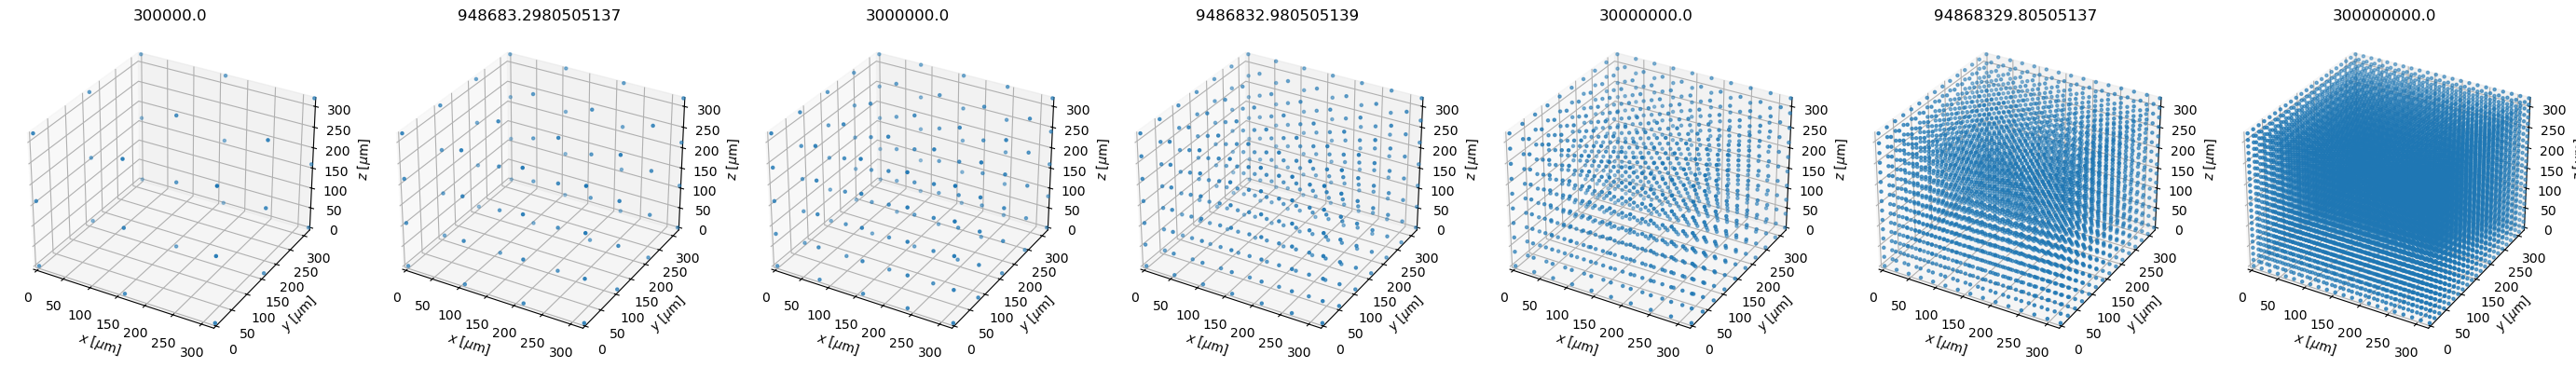

In [17]:
spore_densities = 3 * 10 ** np.arange(5, 8.5, 0.5)
print(spore_densities)

N = 63
dx = 5

# Uniform spore grid
print("Populating uniform 3D spore grid")
spore_coords_all = []
spore_spacing_all = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_grid_coords(N, dx, spore_density)
    spore_coords_all.append(spore_coords)
    spore_spacing_all.append(spore_spacing)

pt.plot_spore_positions(np.full(len(spore_coords_all), N), np.full(len(spore_coords_all), N), spore_coords_all, dx,
                        titles=spore_densities)

The diffusion procedure is then run with at all spore densities until $t_{\textrm{max}}=4 \textrm{h}$.

In [ ]:
# Use fitted permeation coefficient
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018 # M
c_cell_wall = 1.018 # M

# General simulation parameters
t_max = 14400 # seconds
dt = 0.005
dx = 5 # microns
n_save_frames = 100
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Define experiment parameters
global_id = 'ms_250115'
exp_params = []
for density in spore_densities:
    exp_params.append({'expID': global_id, 'simID': f'D{density}', 'label': f'{density} spores/mL', 'dims': 3,
                       'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': density})

# Run simulations
st.run_diffusion_experiments_multi_spore(exp_params, t_max, dt, dx, n_save_frames, V_spore, c_thresh_factors)

Conversion: 3.00000000000000E-7 micrometers^-3
D300000.0: Running simulation 300000.0 spores/mL on lattice with size 30
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [155 155 155] microns.


c:\Users\mihbo\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


0.009854907320657495
Conversion: 9.48683298050514E-7 micrometers^-3
D948683.2980505137: Running simulation 948683.2980505137 spores/mL on lattice with size 21
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [110 110 110] microns.


c:\Users\mihbo\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 27 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


0.009911920170300764
Conversion: 0.00000300000000000000 micrometers^-3
D3000000.0: Running simulation 3000000.0 spores/mL on lattice with size 14
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [75 75 75] microns.


c:\Users\mihbo\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 8 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 26 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


KeyboardInterrupt: 

## 2. Diffusion between spores at the bottom of the medium

A heterogeneous densification occurs naturally when spores sink to the bottom of the medium due to gravity. In a typical experimental setup [1] the time until spores sink to the bottom of a well filled with $150 \mu\textrm{L}$ medium (from which a medium depth of 3.9 mm is calculated) is about 1 hours. This is a significant period overlapping with inhibitor release that needs to be accounted for. For the sake of simplicity it is assumed that during the settling process the inhibitor diffuses homogeneously like in the 3D grid scenario, so the simulations of the 2D lattice bottom array start with a concentration equivalent to $c(t=3600\textrm{s})$.

The lattice used in these simulations is periodic along the $x$ and the $y$ dimensions but has a Neumann boundary condition at $z=0$ and $z=h$, which sets the derivative of the concentration normal to the boundary to zero. As before, the lattice size along the first two dimensions is adapted to the input spore density. The spore densities from the first multi-spore experiment (5000, 10000, 20000, and 40000 spores per $150 \mu\text{L}$) are used. The height of the medium is set to $h=3900\mu\textrm{m}$, which equates to $H=780$ lattice sites in the $z$-direction.

In [24]:
reload(st)
reload(df)

<module 'diffusion' from 'c:\\Users\\mihbo\\Documents\\GitHub\\msc-thesis\\Code\\diffusion.py'>

In [25]:
# Use fitted permeation coefficient
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018 # M
c_cell_wall = 1.018 # M

# General simulation parameters
t_max = 14400 # seconds
dt = 0.005
dx = 5 # microns
H = 780
n_save_frames = 1000
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Input spore densities
spore_density_base = 1/3 * 10**5 # spores per mL
density_factors = 2**np.arange(0, 4, 1)
spore_densities = spore_density_base * density_factors

# Define experiment parameters
global_id = 'msb_250115'
exp_params = []
for density in spore_densities:
    exp_params.append({'expID': global_id, 'simID': f'D{density}', 'label': f'{density} spores/mL', 'dims': 3,
                       'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': density})

# Run simulations
st.run_diffusion_experiments_multi_spore_bottom(exp_params, t_max, dt, dx, H, n_save_frames, V_spore, c_thresh_factors)

Conversion: 3.33333333333333E-8 micrometers^-3
D33333.33333333333: Running simulation 33333.33333333333 spores/mL on lattice with size 63 and height 780
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [ 320  320 3905] microns.


c:\Users\mihbo\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


KeyboardInterrupt: 

## References

[1] Ijadpanahsaravi, Maryam, L. Basten Snoek, Wieke R. Teertstra and Han A. B. Wösten. “The impact of inter- and intra-species spore density on germination of the food spoilage fungus Aspergillus niger.” International journal of food microbiology 410 (2023): 110495 .